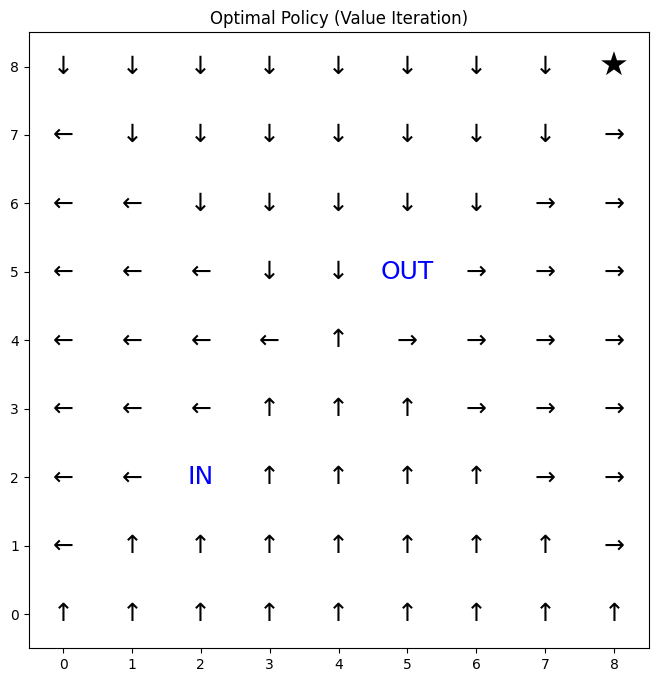

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Grid size
grid_size = 9

# Initialize grid
grid = np.zeros((grid_size, grid_size))

# Goal position
goal_position = (8, 8)
grid[goal_position] = 1  # Mark goal with a reward of +1

# Tunnel positions (IN and OUT)
tunnel_in = (2, 2)
tunnel_out = (5, 5)

# Discount factor
gamma = 0.9

# Convergence threshold
threshold = 0.001

def value_iteration(grid, goal_position, tunnel_in, tunnel_out, gamma=0.9, threshold=0.001):
    value_function = np.zeros(grid.shape)
    policy = np.zeros(grid.shape, dtype=int)
    actions = [(-1, 0), (1, 0), (0, -1), (0, 1)]  # Up, Down, Left, Right

    while True:
        delta = 0
        for i in range(grid.shape[0]):
            for j in range(grid.shape[1]):
                if (i, j) == goal_position:
                    continue
                v = value_function[i, j]
                action_values = []
                for a, action in enumerate(actions):
                    next_i, next_j = i + action[0], j + action[1]
                    if (next_i, next_j) == tunnel_in:
                        next_i, next_j = tunnel_out
                    if 0 <= next_i < grid_size and 0 <= next_j < grid_size:
                        action_values.append(-0.04 + gamma * value_function[next_i, next_j])
                    else:
                        action_values.append(v)  # Stay in place if action leads out of bounds
                value_function[i, j] = max(action_values)
                policy[i, j] = np.argmax(action_values)
                delta = max(delta, abs(v - value_function[i, j]))
        if delta < threshold:
            break
    
    return value_function, policy

V_vi, policy_vi = value_iteration(grid, goal_position, tunnel_in, tunnel_out, gamma, threshold)

def plot_policy(policy, title="Optimal Policy"):
    actions_map = {0: '↑', 1: '↓', 2: '←', 3: '→'}
    grid_policy = np.vectorize(actions_map.get)(policy)
    
    plt.figure(figsize=(8, 8))
    plt.title(title)
    for i in range(grid_size):
        for j in range(grid_size):
            if (i, j) == goal_position:
                plt.text(j, i, "★", ha='center', va='center', fontsize=24)
            elif (i, j) == tunnel_in:
                plt.text(j, i, "IN", ha='center', va='center', fontsize=18, color='blue')
            elif (i, j) == tunnel_out:
                plt.text(j, i, "OUT", ha='center', va='center', fontsize=18, color='blue')
            else:
                plt.text(j, i, grid_policy[i, j], ha='center', va='center', fontsize=18)
    plt.xlim(-0.5, grid_size-0.5)
    plt.ylim(-0.5, grid_size-0.5)
    plt.gca().axis()
    plt.show()

plot_policy(policy_vi, "Optimal Policy (Value Iteration)")
